## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
merge_data['Mouse ID'].value_counts()

g989    13
i635    10
q597    10
a275    10
p189    10
        ..
x336     1
o848     1
v199     1
h428     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#merge_data.sort_values(["Mouse ID", "Timepoint"], axis=0, ascending=True, inplace=True)
merge_data[merge_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = merge_data[merge_data.duplicated(['Mouse ID'], keep=False)]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_data = merge_data.drop_duplicates(['Mouse ID'], keep='last',inplace=False)
Clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [7]:
# Checking the number of mice in the clean DataFrame.
Mice_counts = len (Clean_data['Mouse ID'].unique())
Mice_counts

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = pd.Series(merge_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"])
tumor_median = pd.Series(merge_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"])
tumor_variance = pd.Series(merge_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"])
tumor_stdev = pd.Series(merge_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"])
tumor_sem = pd.Series(merge_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"])

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_frame = { 'tumor_volume_mean': tumor_mean,
              'tumor_volume_median': tumor_median,
              'tumor_volume_variance': tumor_variance,
              'tumor_volume_stdev': tumor_stdev,
              'tumor_volume_sem': tumor_sem}
summary_statistics = pd.DataFrame(data_frame)
summary_statistics

,tumor_volume_mean,tumor_volume_median,tumor_volume_variance,tumor_volume_stdev,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
x_axis = merge_data ["Timepoint"].unique()
y_axis = merge_data ["Drug Regimen"].value_counts()

Text(0, 0.5, 'Data TimePoint')

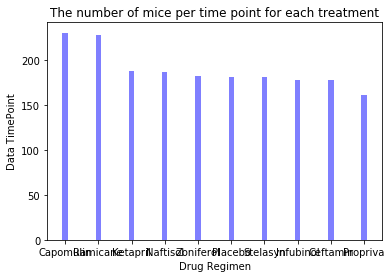

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn",
                            "Infubinol", "Ceftamin", "Propriva"])
plt.title("The number of mice per time point for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Data TimePoint")

## Pie Plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = merge_data ["Sex"].unique()
sizes = merge_data ["Sex"].value_counts()
colors = ["lightskyblue", "pink"]

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

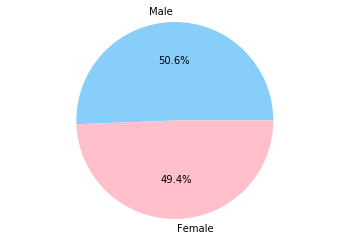

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
